## Import Initial Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
data_file = pd.read_csv('titanic_train.csv')
data_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Statistical Analysis

In [3]:
data_file.shape

(891, 12)

In [4]:
data_file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Data Handling

# Drop Cabin column and PassengerID column from the dataframe

data_file = data_file.drop(columns=['PassengerId','Cabin'],axis=1)
data_file

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
# Replacing the NaN values in Age column with the mean values of all the age values

data_file['Age'].fillna(data_file['Age'].mean(), inplace=True)
data_file

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [9]:
# Finding the mode value in embarked column

print(data_file['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [12]:
data_file['Embarked'].fillna(data_file['Embarked'].mode()[0], inplace=True)

In [13]:
data_file.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
data_file.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data_file = data_file.drop(columns=['Name','Ticket'],axis=1)

In [16]:
data_file

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


## Data Handling by LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

In [21]:
df2 = lbl_enc.fit_transform(data_file['Sex'])
pd.Series(df2)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int32

In [22]:
df3 = lbl_enc.fit_transform(data_file['Embarked'])
pd.Series(df3)

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int32

In [23]:
data_file['Sex'] = df2
data_file['Embarked'] = df3
data_file

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


## Visualizing data for skewness

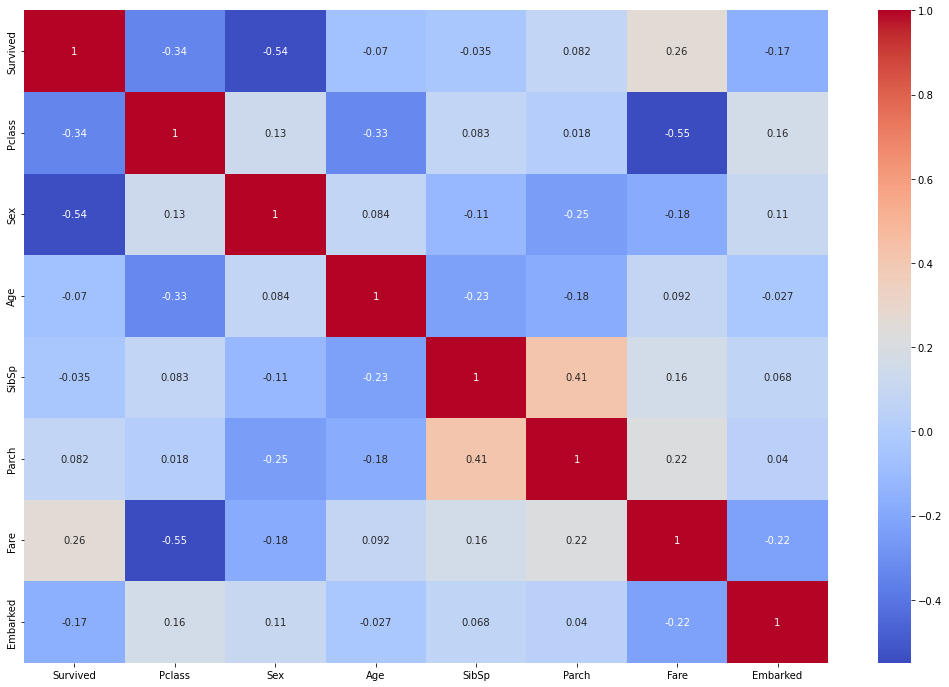

In [25]:
df_corr = data_file.corr()

plt.figure(figsize = (18,12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

## Data Preprocessing

In [26]:
data_file.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [28]:
data_file.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.167675
Name: Survived, dtype: float64

In [29]:
from scipy.stats import zscore

z = np.abs(zscore(data_file))
z.shape

(891, 8)

In [30]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [31]:
len(np.where(z>3)[0])

72

In [32]:
df = data_file[(z<3).all(axis=1)]
print('Old Dataframe', data_file.shape)
print('New Dataframe', df.shape)
print('Total dropped rows :', data_file.shape[0] - df.shape[0])

Old Dataframe (891, 8)
New Dataframe (820, 8)
Total dropped rows : 71


## Splitting Features and Labels

In [34]:
y = df['Survived']
X = df.drop(['Survived'], axis=1)

In [35]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [36]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
X

array([[ 0.87283049,  0.72203588, -0.61846778, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.68588353, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.28381447, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273,  0.0200539 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.28381447, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.20668289, ..., -0.48469263,
        -0.76629016, -1.24967343]])

In [37]:
pd.DataFrame(X).skew().sort_values()

6   -1.073724
1   -0.664152
0   -0.429718
5   -0.018602
2    0.071813
3    0.948944
4    1.581505
dtype: float64

## Defining a class with model score and CV score to be called

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Accuracy Score :', (accuracy_score(y_test, y_pred) * 100), '%')
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score :', np.mean(score) * 100, '%')

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
classify(lr, X, y)

Accuracy Score : 81.95121951219512 %
CV Score : 79.14634146341463 %


In [60]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
classify(kn, X, y)

Accuracy Score : 81.95121951219512 %
CV Score : 81.46341463414635 %


In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
classify(dt, X, y)

Accuracy Score : 84.8780487804878 %
CV Score : 75.97560975609755 %


In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
classify(rf, X, y)

Accuracy Score : 83.90243902439025 %
CV Score : 80.2439024390244 %


In [63]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()
classify(et, X, y)

Accuracy Score : 82.92682926829268 %
CV Score : 78.04878048780488 %


In [64]:
import lightgbm

lg = lightgbm.LGBMClassifier()
classify(lg, X, y)

Accuracy Score : 82.92682926829268 %
CV Score : 81.09756097560975 %


In [65]:
from sklearn.svm import SVC

sv = SVC()
classify(sv, X, y)

Accuracy Score : 82.4390243902439 %
CV Score : 81.34146341463415 %


# Plotting the ROC AUC Curve for the best model

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
lg = lightgbm.LGBMClassifier()
sv = SVC()

lr.fit(x_train, y_train)
kn.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
et.fit(x_train, y_train)
lg.fit(x_train, y_train)
sv.fit(x_train, y_train)

print('All the models have been trained')

All the models have been trained


In [67]:
lr.score(x_test, y_test)
kn.score(x_test, y_test)
dt.score(x_test, y_test)
rf.score(x_test, y_test)
et.score(x_test, y_test)
lg.score(x_test, y_test)
sv.score(x_test, y_test)

print('All Model Score has been captured')

All Model Score has been captured


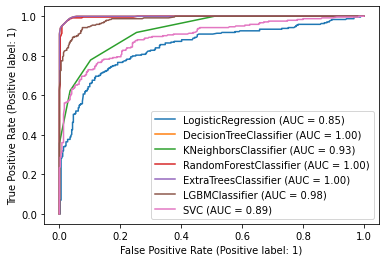

In [68]:
disp = plot_roc_curve(lr, x_train, y_train)

plot_roc_curve(dt, x_train, y_train, ax=disp.ax_)  # ax_ = Axes with confusion matrix

plot_roc_curve(kn, x_train, y_train, ax=disp.ax_)

plot_roc_curve(rf, x_train, y_train, ax=disp.ax_)

plot_roc_curve(et, x_train, y_train, ax=disp.ax_)

plot_roc_curve(lg, x_train, y_train, ax=disp.ax_)

plot_roc_curve(sv, x_train, y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

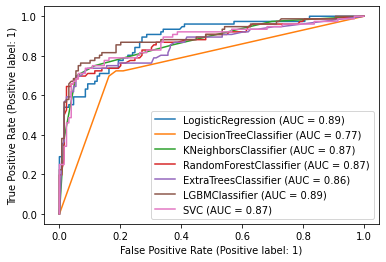

In [69]:
disp = plot_roc_curve(lr, x_test, y_test)

plot_roc_curve(dt, x_test, y_test, ax=disp.ax_)  # ax_ = Axes with confusion matrix

plot_roc_curve(kn, x_test, y_test, ax=disp.ax_)

plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)

plot_roc_curve(et, x_test, y_test, ax=disp.ax_)

plot_roc_curve(lg, x_test, y_test, ax=disp.ax_)

plot_roc_curve(sv, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()